In [1]:
from nltk.corpus import gutenberg

### Extract words ###

In [2]:
gutenberg.fileids()
#returns list of file names

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
r_bible = gutenberg.raw('bible-kjv.txt')
#returns the text as one long string

In [4]:
r_bible[:100]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called '

In [5]:
l_w_bible = gutenberg.words('bible-kjv.txt')
#returns list of all words

In [6]:
l_w_bible[:10]

['[', 'The', 'King', 'James', 'Bible', ']', 'The', 'Old', 'Testament', 'of']

In [7]:
l_s_bible = gutenberg.sents('bible-kjv.txt')
#returns list of all senteces

In [134]:
l_s_bible[3]
#returns first sentene which is at index 3

['1',
 ':',
 '1',
 'In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

In [9]:
from nltk.corpus import brown

In [11]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [12]:
brown.fileids(categories=['humor'])
#filter by category

['cr01', 'cr02', 'cr03', 'cr04', 'cr05', 'cr06', 'cr07', 'cr08', 'cr09']

### Frequency Distribution ###

In [ ]:
### Frequency Distribution

In [16]:
from nltk import ConditionalFreqDist, FreqDist

In [17]:
s = 'I saw Suise sittins in a shoe shine shop. Where she sits she shines and where she shines she sits.'

In [18]:
l = s.split()

In [19]:
l

['I',
 'saw',
 'Suise',
 'sittins',
 'in',
 'a',
 'shoe',
 'shine',
 'shop.',
 'Where',
 'she',
 'sits',
 'she',
 'shines',
 'and',
 'where',
 'she',
 'shines',
 'she',
 'sits.']

In [20]:
fd = FreqDist(l)
#returns a dictionary structure with the instances number of each word

In [21]:
fd

FreqDist({'she': 4, 'shines': 2, 'I': 1, 'saw': 1, 'Suise': 1, 'sittins': 1, 'in': 1, 'a': 1, 'shoe': 1, 'shine': 1, ...})

In [22]:
fd.most_common(2)
#returns the N most common words

[('she', 4), ('shines', 2)]

In [23]:
l_w_humor = brown.words(categories='humor')

In [24]:
len(l_w_humor)

21695

In [27]:
fd_w_humor =FreqDist(l_w_humor)

In [28]:
fd_w_humor.most_common(10)

[(',', 1331),
 ('the', 930),
 ('.', 877),
 ('of', 515),
 ('and', 512),
 ('a', 505),
 ('to', 463),
 ('``', 343),
 ("''", 340),
 ('in', 334)]

In [29]:
fd_w_humor.hapaxes()

['Hinkle',
 'fancying',
 'marriages',
 'listed',
 'Mormon',
 'Beard',
 'instigation',
 'fourth',
 'victim',
 'beard',
 'secured',
 'report',
 'trail',
 'Cal',
 'gas',
 'main',
 'boulevards',
 'attendants',
 'Ye',
 'Olde',
 'Gasse',
 'Filling',
 'Station',
 'Avocado',
 'Avenue',
 'paused',
 'route',
 'Diego',
 'headed',
 'direction',
 'Juan',
 'Capistrano',
 'By-the-Sea',
 'quaint',
 'Spanish',
 'Mission',
 'Drive-in',
 'eating',
 'tamale',
 'convertible',
 'quest',
 'stolen',
 'rug',
 'robe',
 'pawnshop',
 'Glendale',
 'placed',
 'informing',
 'questioning',
 'apprehended',
 'larceny',
 'suspect',
 'murders',
 'uncovered',
 'meaningless',
 'phrases',
 'souls',
 'detective',
 'commenting',
 'behavior',
 'myriad',
 'citizens',
 'community',
 'mentally',
 'unhinged',
 'harmless',
 'awaiting',
 'failed',
 'endeavoring',
 'wrists',
 'fainted',
 'sight',
 'blood',
 'authorities',
 'significance',
 'episode',
 'offered',
 'whisky',
 'lifelong',
 'teetotaler',
 'vaulting',
 'mayorship',
 'esca

In [30]:
fd_w_humor.max()

','

In [32]:
fd_w_humor.freq('the')
#the frequency of a word = instances number of the word / length of text

0.04286702005070293

In [33]:
fd_w_humor.get('the')
#returns the instances number of the word 

930

In [34]:
l1 = [('cat1', 'good'), ('cat2', 'bad'), ('cat1', 'good')]

In [135]:
cfd = ConditionalFreqDist(l1)

In [136]:
cfd

<ConditionalFreqDist with 2 conditions>

In [37]:
cfd['cat1']

FreqDist({'good': 2})

In [45]:
cfd = ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news','religion', 'hobbies','science_fiction','romance','humor']
modals = ['can','could','may','might','must','will']
cfd.tabulate(conditions = genres, samples=modals)
#returns the tabulates frequency of sample words in each of the categories

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Frequency Distribution ###

In [46]:
### names and Last Letter

#Our hypothesis:
    H0 = More female names end in letter R than male names

In [47]:
from nltk.corpus import names

In [48]:
#exatract last letter of male names and female names
l_names = ([('male',name[-1]) for name in names.words('male.txt')] +
           [('female',name[-1]) for name in names.words('female.txt')])


In [49]:
cfd_names = ConditionalFreqDist(l_names)

In [52]:
cfd_names

<ConditionalFreqDist with 2 conditions>

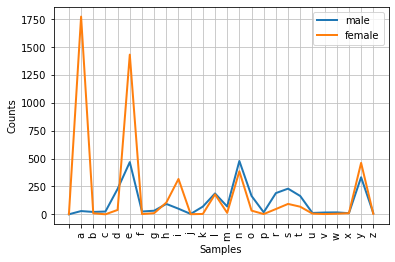

In [54]:
cfd_names.plot()

### Stemming ###

In [68]:
### stemming ###

In [56]:
from nltk.stem import PorterStemmer

In [57]:
pstem = PorterStemmer()

In [58]:
pstem.stem('walking')

'walk'

In [62]:
from nltk.stem import LancasterStemmer

In [64]:
lst = LancasterStemmer()

In [65]:
lst.stem('presumably')

'presum'

In [69]:
lst.stem('maximum')

'maxim'

In [70]:
from nltk.stem import RegexpStemmer

In [72]:
rst = RegexpStemmer(r'ing$|s$|e$|able$')

In [75]:
rst.stem('controllable')

'controll'

### Lemmatizers ###

In [76]:
### Lemmatizers ###
#using WordNet 

In [77]:
from nltk.corpus import wordnet as wn

In [78]:
wn.synsets('spoke')

[Synset('spoke.n.01'),
 Synset('rundle.n.01'),
 Synset('talk.v.02'),
 Synset('talk.v.01'),
 Synset('speak.v.03'),
 Synset('address.v.02'),
 Synset('speak.v.05')]

In [88]:
wn.synset('talk.v.01').definition()


'exchange thoughts; talk with'

In [89]:
wn.synset('talk.v.01').examples()

['We often talk business', 'Actions talk louder than words']

In [90]:
for syn in wn.synsets('spoke'):
    print(syn, ':', syn.lemma_names())

Synset('spoke.n.01') : ['spoke', 'wheel_spoke', 'radius']
Synset('rundle.n.01') : ['rundle', 'spoke', 'rung']
Synset('talk.v.02') : ['talk', 'speak', 'utter', 'mouth', 'verbalize', 'verbalise']
Synset('talk.v.01') : ['talk', 'speak']
Synset('speak.v.03') : ['speak', 'talk']
Synset('address.v.02') : ['address', 'speak']
Synset('speak.v.05') : ['speak']


In [91]:
wn.synsets('spoken')

[Synset('talk.v.02'),
 Synset('talk.v.01'),
 Synset('speak.v.03'),
 Synset('address.v.02'),
 Synset('speak.v.05'),
 Synset('spoken.a.01')]

In [92]:
for syn in wn.synsets('spoken'):
    print(syn, ':', syn.lemma_names())

Synset('talk.v.02') : ['talk', 'speak', 'utter', 'mouth', 'verbalize', 'verbalise']
Synset('talk.v.01') : ['talk', 'speak']
Synset('speak.v.03') : ['speak', 'talk']
Synset('address.v.02') : ['address', 'speak']
Synset('speak.v.05') : ['speak']
Synset('spoken.a.01') : ['spoken']


In [93]:
from nltk.stem import WordNetLemmatizer

In [96]:
wln = WordNetLemmatizer()

In [97]:
wln.lemmatize('spoken')

'spoken'

In [98]:
wln.lemmatize('spoken','v')

'speak'

In [100]:
wln.lemmatize('worst','a')

'bad'

### Tokenization ###

In [101]:
### tokenization ###

In [113]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [105]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [110]:
r = gutenberg.raw(['austen-emma.txt'])

In [111]:
emma = r[50:477]
emma

"Emma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [118]:
s = sent_tokenize(emma)

In [119]:
len(s)

2

In [120]:
s[0]

'Emma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [121]:
s[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [122]:
s1 = emma.split('.')

In [123]:
s1[0]

'Emma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her'

In [125]:
s2 = r[704:908]
s2

"Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters."

In [126]:
s3 = s2.split('.')

In [127]:
s3[0]

'Sixteen years had Miss Taylor been in Mr'

In [128]:
s3[1]

" Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma"

In [130]:
s4 = sent_tokenize(s2)

In [131]:
s4[0]

"Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma."

In [132]:
s4[1]

'Between _them_ it was more the intimacy\nof sisters.'

In [133]:
w1 = word_tokenize(s4[0])
w1

['Sixteen',
 'years',
 'had',
 'Miss',
 'Taylor',
 'been',
 'in',
 'Mr.',
 'Woodhouse',
 "'s",
 'family',
 ',',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 ',',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 ',',
 'but',
 'particularly',
 'of',
 'Emma',
 '.']